## 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [2]:
np.set_printoptions(suppress=True)
# numpy float 출력옵션 변경
# suppress : 과학적 표기법의 사용여부

데이터 로드

In [3]:
data = load_boston()

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [5]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [6]:
df['MEDV'] = data['target']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

train / test 데이터를 분할 합니다.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [10]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [11]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,5.82115,0.0,18.10,0.0,0.713,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39


In [12]:
y_train.head()

463    20.2
163    50.0
414     7.0
86     22.5
159    23.3
Name: MEDV, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [13]:
import numpy as np

In [14]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [15]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()
# actual : 실제값
# pred(prediction) : 예측치

In [16]:
my_mse(pred, actual)

4.0

In [17]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [18]:
my_mae(pred, actual)

2.0

In [19]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))
# np.sqrt : 배열 원소의 제곱근

In [20]:
my_rmse(pred, actual)

2.0

### sklearn의 평가지표 활용하기

In [21]:
# 사이킷런에서 내장하고 있는 metrics인 mae와 mse 
from sklearn.metrics import mean_absolute_error, mean_squared_error
# MAE (Mean Absolute Error, 절대 평균 오차(오차는 실제 값과 예측 값의 차이)
# MSE (Mean Squared Error, 평균 제곱 오차)

In [22]:
my_mae(pred, actual), mean_absolute_error(pred, actual)
# actual : 실제값
# pred(prediction) : 예측치

(2.0, 2.0)

In [23]:
my_mse(pred, actual), mean_squared_error(pred, actual)
# actual : 실제값
# pred(prediction) : 예측치

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')    # 산점도 그리기 함수
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df))) 
    # 전체 데이터 범위에 맞춰 y축의 눈금을 어디에 배치할지 지정
    
    ax.set_yticklabels(df['model'], fontsize=15)
    # y축의 눈금 이름을 다르게 지정
    
    bars = ax.barh(np.arange(len(df)), df['mse'])
    # bar : 세로 막대그래프 그리기
    # barh : 가로 막대 그래프를 그리는 함수
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        # text(x축, y축, 문자열, 기타 옵션들)
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(n_jobs=-1)

* n_jobs: CPU코어의 사용

In [27]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [28]:
print(model.coef_)

[ -0.11683062   0.06238837   0.02878397   3.23160953 -16.90491486
   3.56141812   0.01195343  -1.53875341   0.32575264  -0.01254635
  -0.96383854   0.00817772  -0.57889236]


In [29]:
pred = model.predict(x_test)

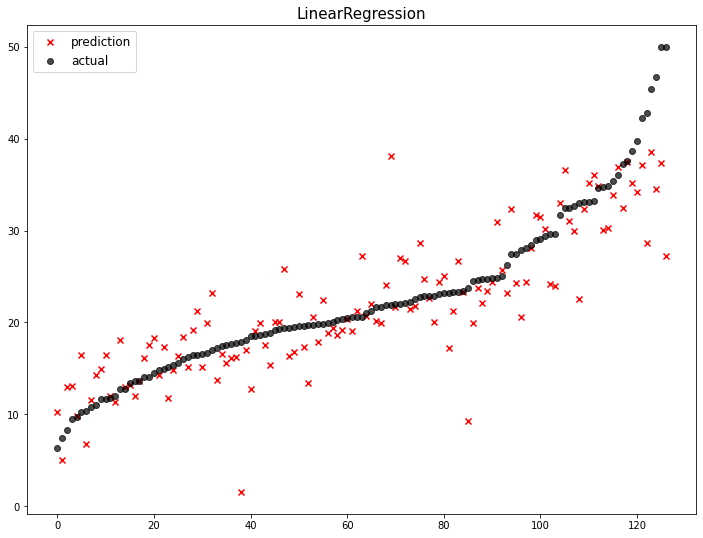

              model        mse
0  LinearRegression  24.318426


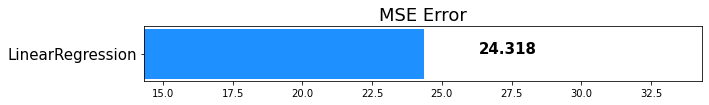

In [30]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다. 
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$ 

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [31]:
from sklearn.linear_model import Ridge

In [32]:
# 값이 커질 수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

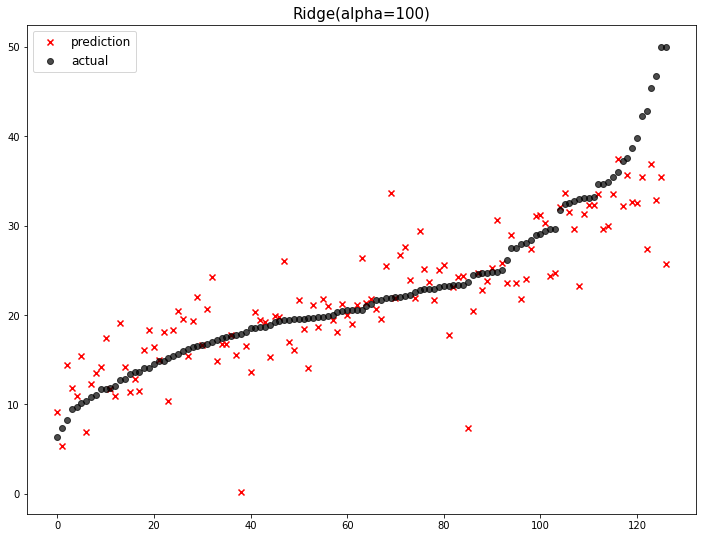

              model        mse
0  Ridge(alpha=100)  26.212669
1  LinearRegression  24.318426


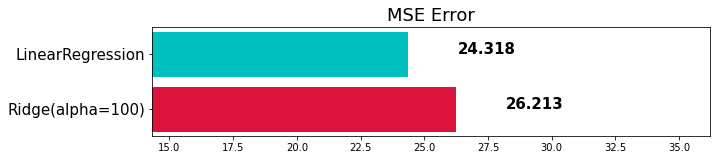

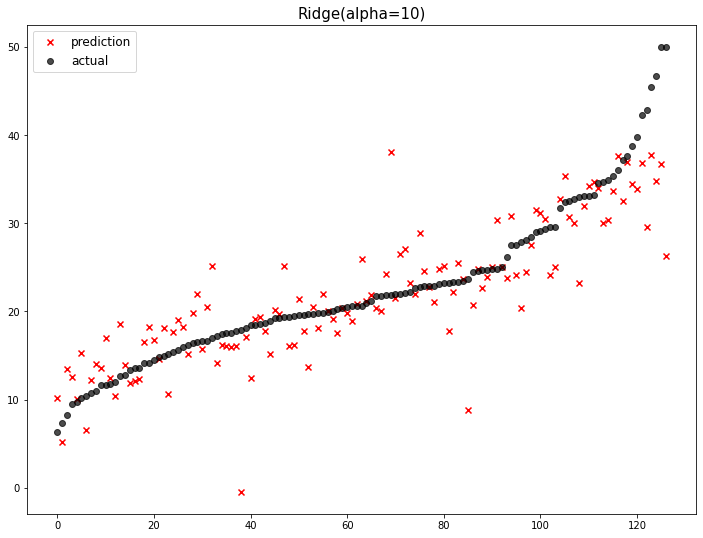

              model        mse
0  Ridge(alpha=100)  26.212669
1   Ridge(alpha=10)  24.981828
2  LinearRegression  24.318426


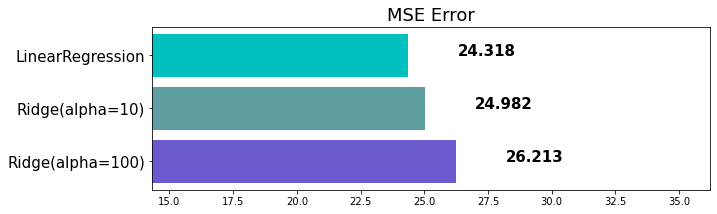

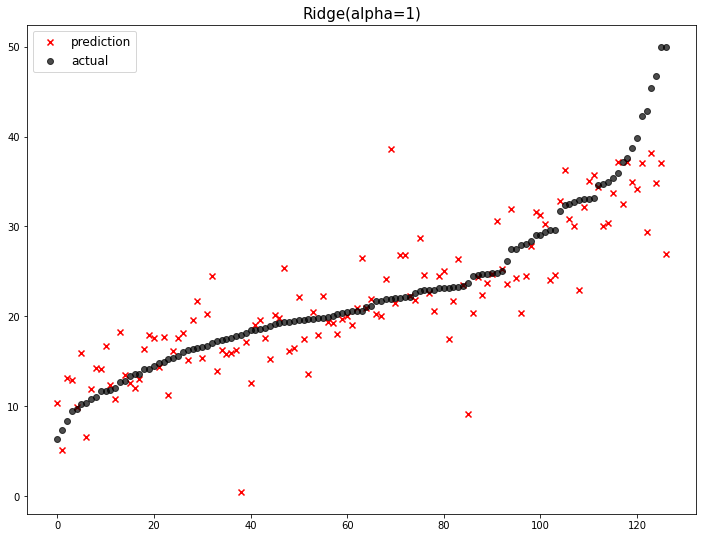

              model        mse
0  Ridge(alpha=100)  26.212669
1   Ridge(alpha=10)  24.981828
2    Ridge(alpha=1)  24.534453
3  LinearRegression  24.318426


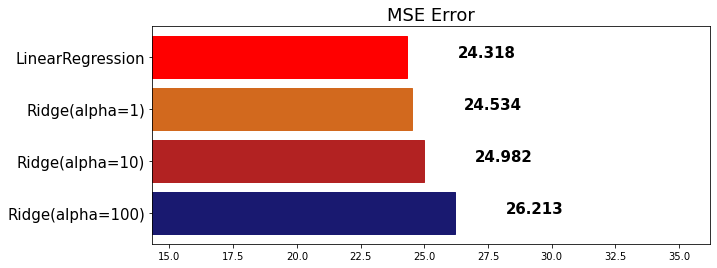

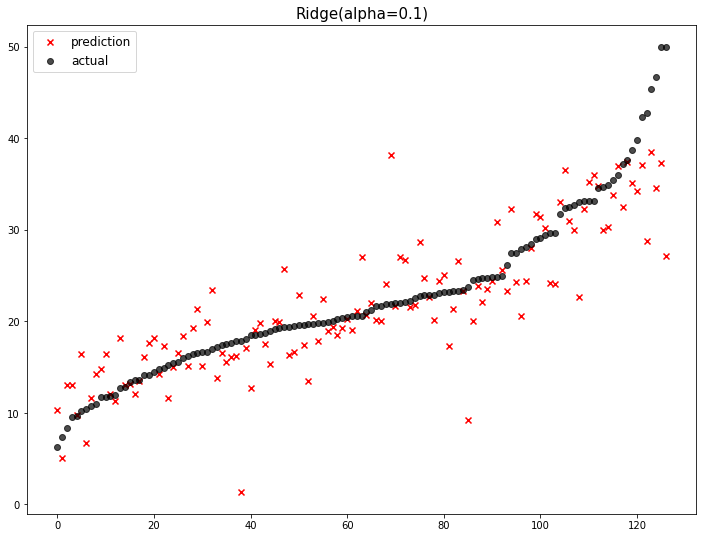

              model        mse
0  Ridge(alpha=100)  26.212669
1   Ridge(alpha=10)  24.981828
2    Ridge(alpha=1)  24.534453
3  Ridge(alpha=0.1)  24.334725
4  LinearRegression  24.318426


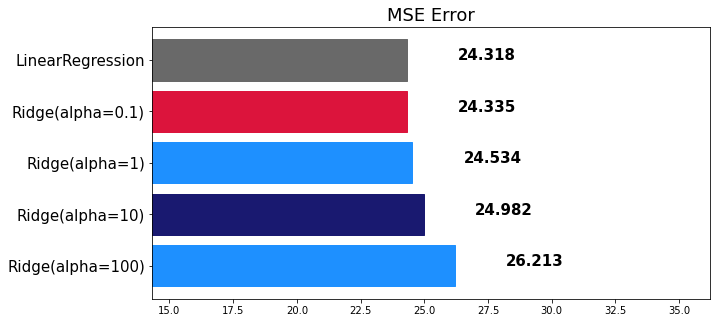

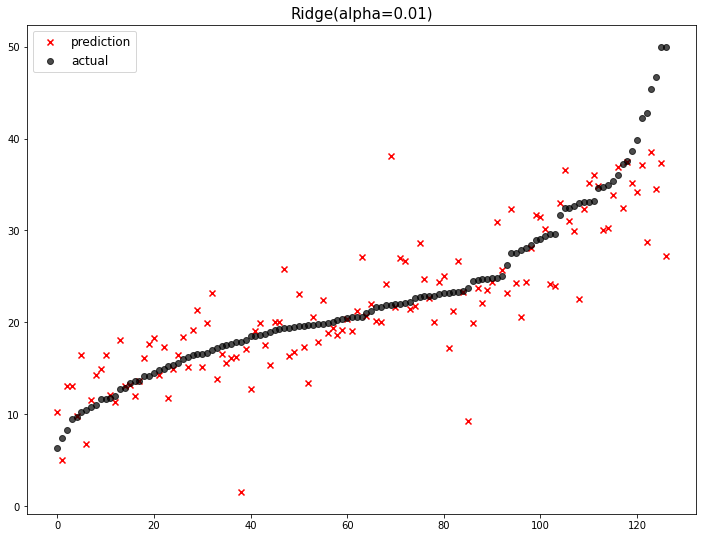

               model        mse
0   Ridge(alpha=100)  26.212669
1    Ridge(alpha=10)  24.981828
2     Ridge(alpha=1)  24.534453
3   Ridge(alpha=0.1)  24.334725
4  Ridge(alpha=0.01)  24.319773
5   LinearRegression  24.318426


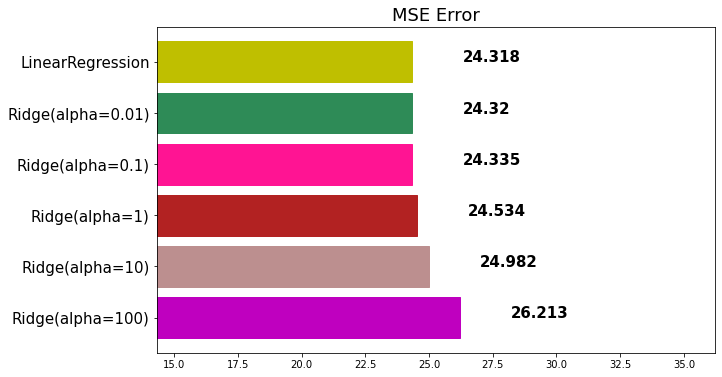

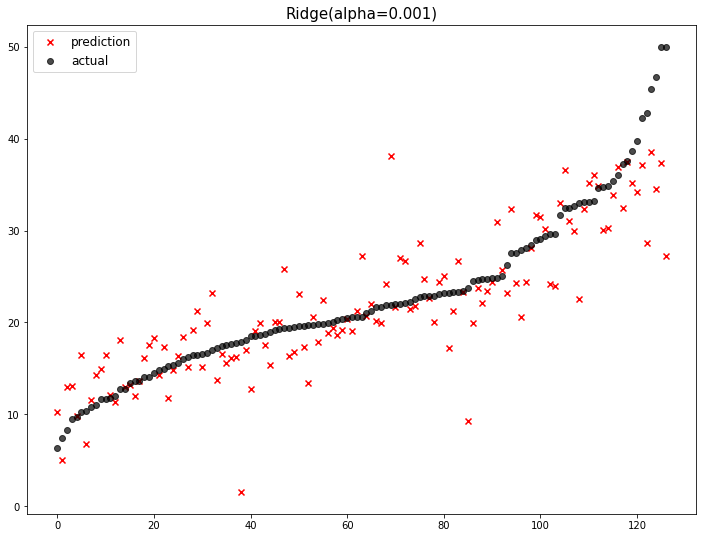

                model        mse
0    Ridge(alpha=100)  26.212669
1     Ridge(alpha=10)  24.981828
2      Ridge(alpha=1)  24.534453
3    Ridge(alpha=0.1)  24.334725
4   Ridge(alpha=0.01)  24.319773
5  Ridge(alpha=0.001)  24.318557
6    LinearRegression  24.318426


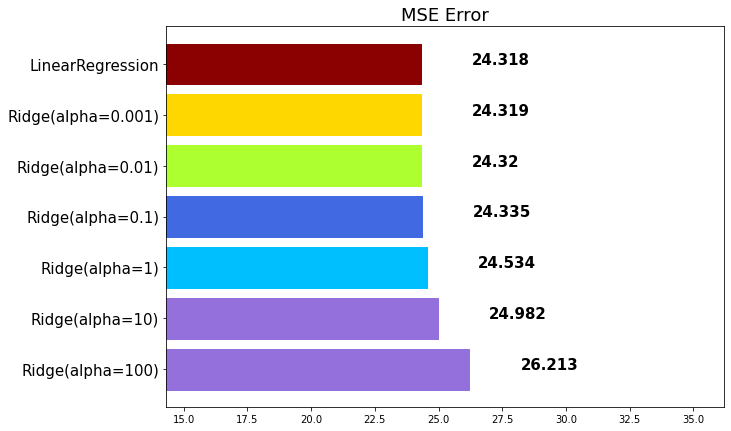

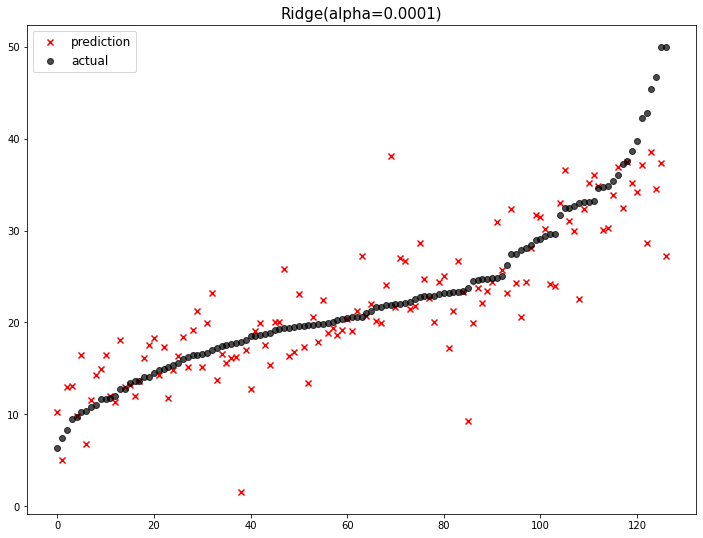

                 model        mse
0     Ridge(alpha=100)  26.212669
1      Ridge(alpha=10)  24.981828
2       Ridge(alpha=1)  24.534453
3     Ridge(alpha=0.1)  24.334725
4    Ridge(alpha=0.01)  24.319773
5   Ridge(alpha=0.001)  24.318557
6  Ridge(alpha=0.0001)  24.318439
7     LinearRegression  24.318426


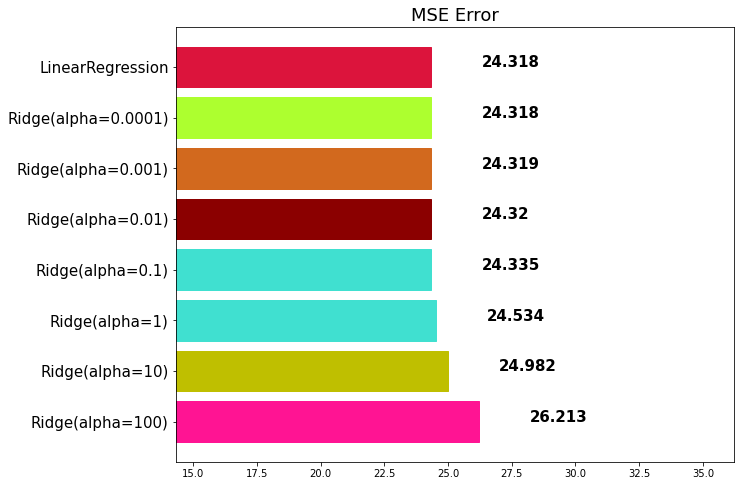

In [33]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [34]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [35]:
ridge.coef_

array([ -0.11682976,   0.06238826,   0.02877825,   3.2315914 ,
       -16.90352464,   3.56143504,   0.01195208,  -1.53873071,
         0.32574913,  -0.01254644,  -0.96382341,   0.00817784,
        -0.57889365])

In [36]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

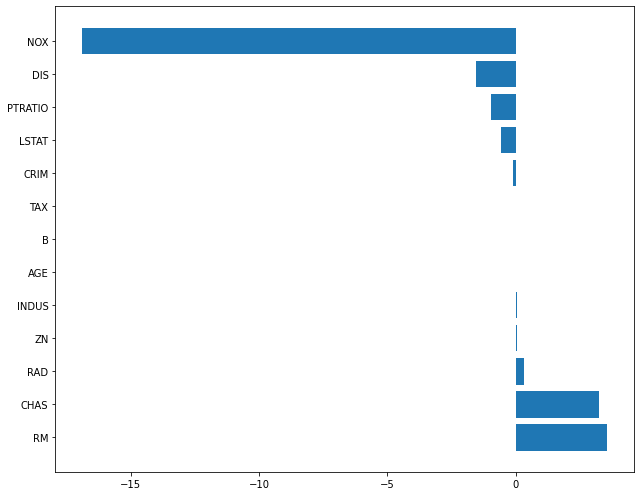

In [37]:
plot_coef(x_train.columns, ridge.coef_)

In [38]:
print(ridge.coef_)

[ -0.11682976   0.06238826   0.02877825   3.2315914  -16.90352464
   3.56143504   0.01195208  -1.53873071   0.32574913  -0.01254644
  -0.96382341   0.00817784  -0.57889365]


alpha 값에 따른 coef 의 차이를 확인해 봅시다

In [39]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

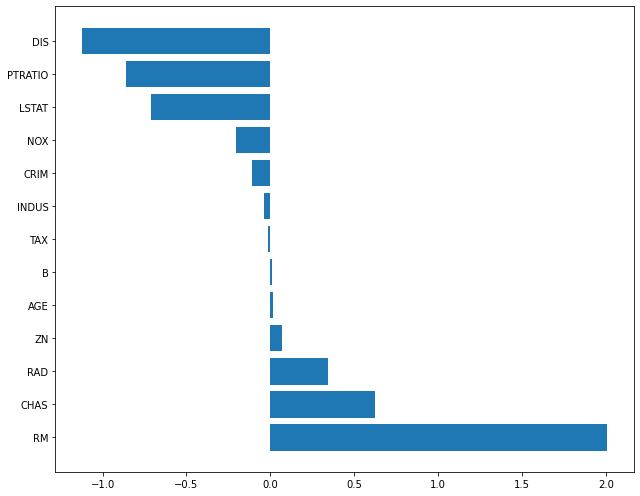

In [40]:
plot_coef(x_train.columns, ridge_100.coef_)

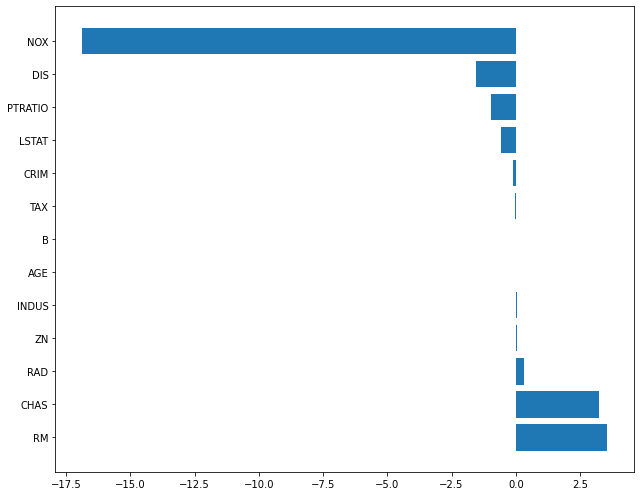

In [41]:
plot_coef(x_train.columns, ridge_001.coef_)

In [42]:
from sklearn.linear_model import Lasso

In [43]:
# 값이 커질 수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

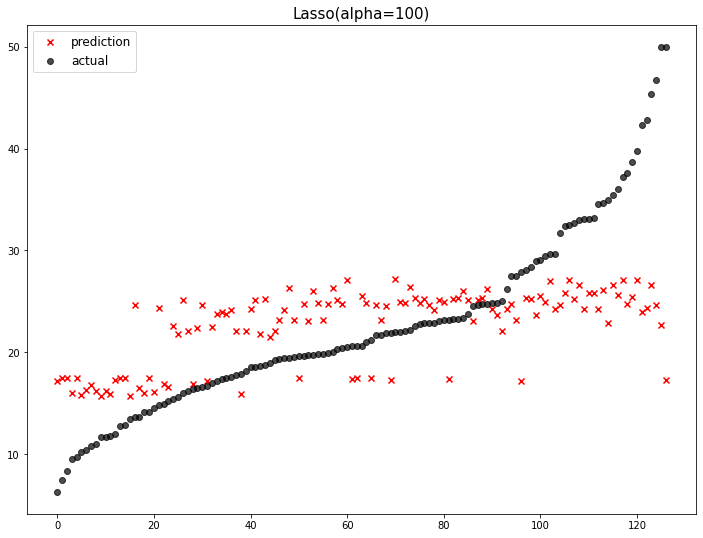

                 model        mse
0     Lasso(alpha=100)  57.964223
1     Ridge(alpha=100)  26.212669
2      Ridge(alpha=10)  24.981828
3       Ridge(alpha=1)  24.534453
4     Ridge(alpha=0.1)  24.334725
5    Ridge(alpha=0.01)  24.319773
6   Ridge(alpha=0.001)  24.318557
7  Ridge(alpha=0.0001)  24.318439
8     LinearRegression  24.318426


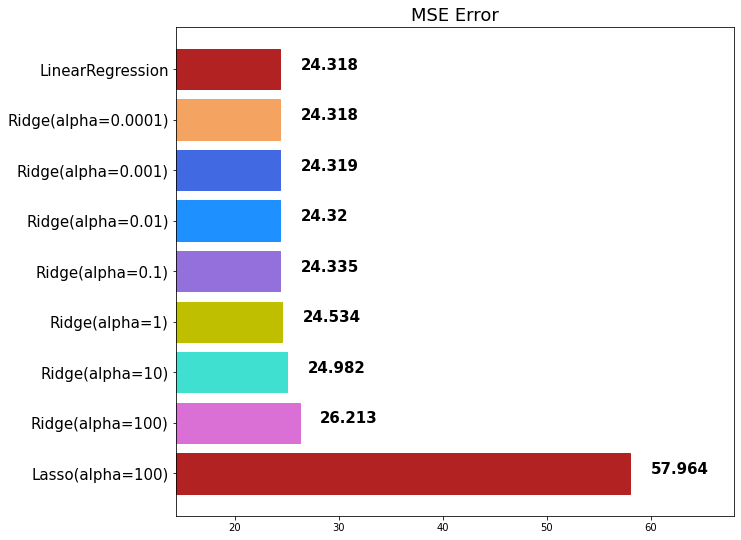

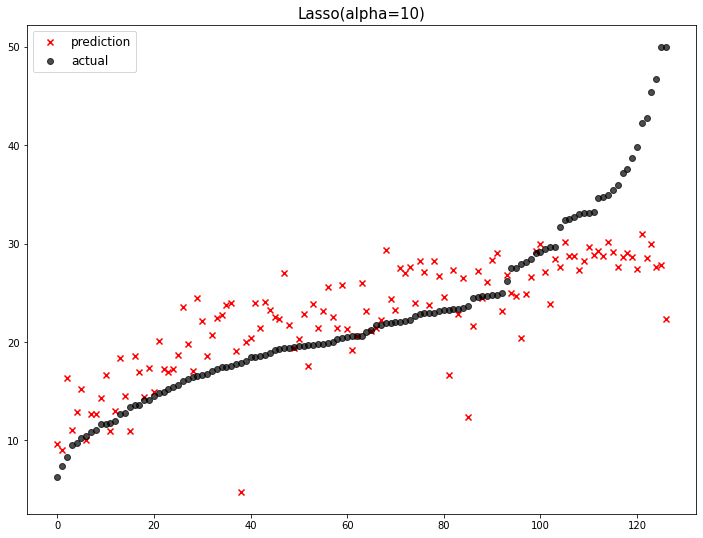

                 model        mse
0     Lasso(alpha=100)  57.964223
1      Lasso(alpha=10)  36.658752
2     Ridge(alpha=100)  26.212669
3      Ridge(alpha=10)  24.981828
4       Ridge(alpha=1)  24.534453
5     Ridge(alpha=0.1)  24.334725
6    Ridge(alpha=0.01)  24.319773
7   Ridge(alpha=0.001)  24.318557
8  Ridge(alpha=0.0001)  24.318439
9     LinearRegression  24.318426


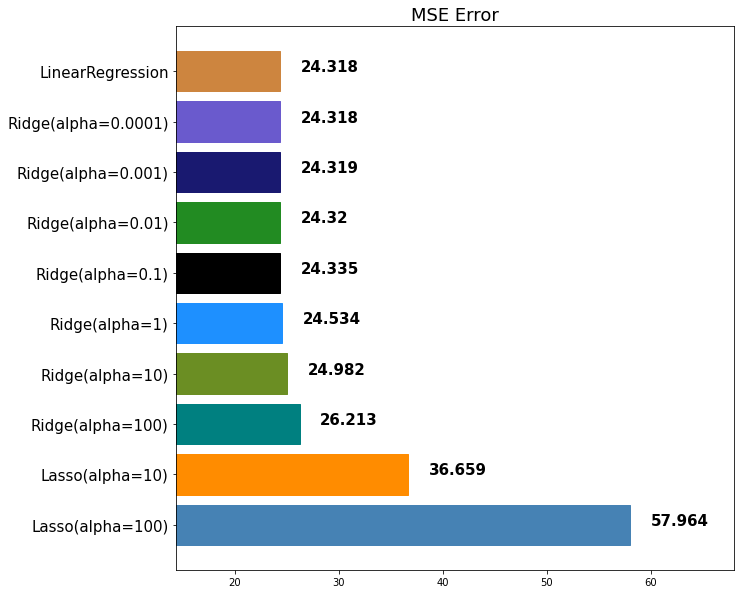

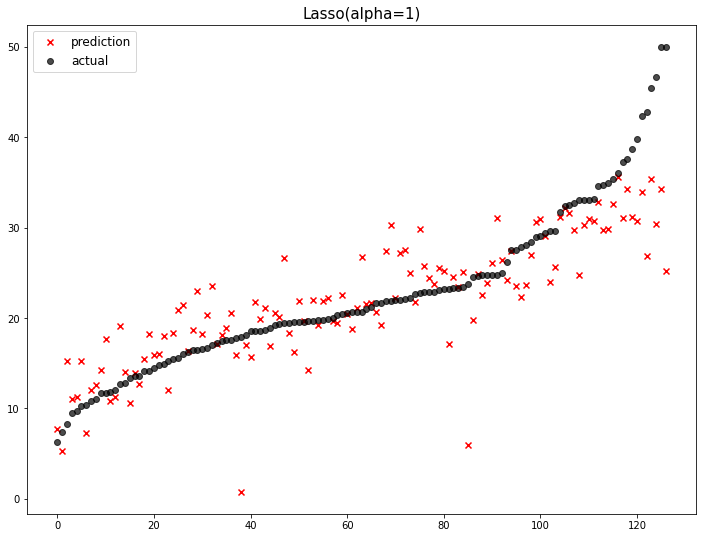

                  model        mse
0      Lasso(alpha=100)  57.964223
1       Lasso(alpha=10)  36.658752
2        Lasso(alpha=1)  28.373671
3      Ridge(alpha=100)  26.212669
4       Ridge(alpha=10)  24.981828
5        Ridge(alpha=1)  24.534453
6      Ridge(alpha=0.1)  24.334725
7     Ridge(alpha=0.01)  24.319773
8    Ridge(alpha=0.001)  24.318557
9   Ridge(alpha=0.0001)  24.318439
10     LinearRegression  24.318426


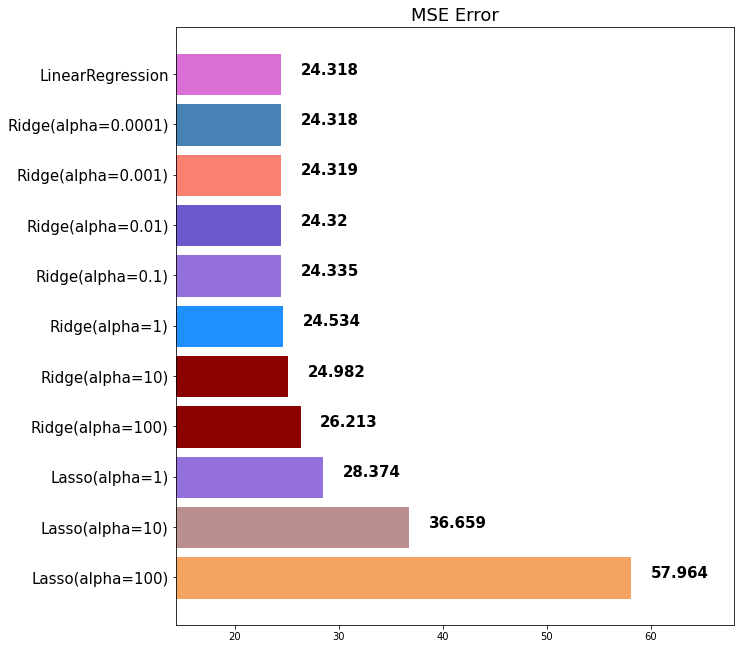

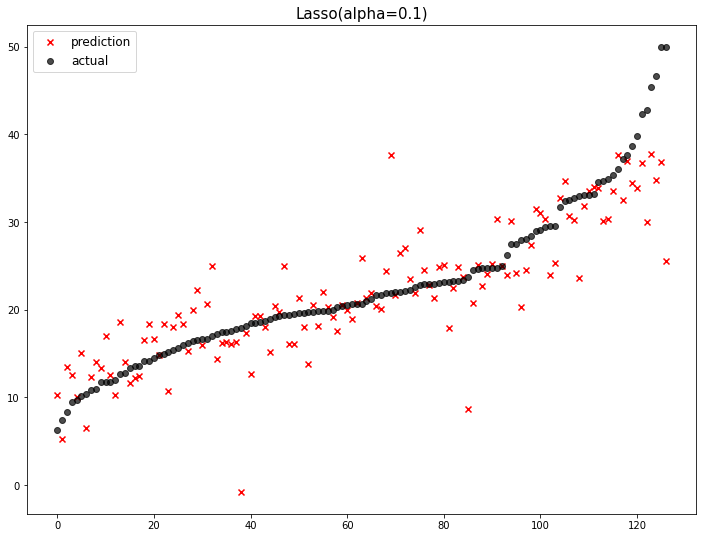

                  model        mse
0      Lasso(alpha=100)  57.964223
1       Lasso(alpha=10)  36.658752
2        Lasso(alpha=1)  28.373671
3      Ridge(alpha=100)  26.212669
4       Ridge(alpha=10)  24.981828
5      Lasso(alpha=0.1)  24.960240
6        Ridge(alpha=1)  24.534453
7      Ridge(alpha=0.1)  24.334725
8     Ridge(alpha=0.01)  24.319773
9    Ridge(alpha=0.001)  24.318557
10  Ridge(alpha=0.0001)  24.318439
11     LinearRegression  24.318426


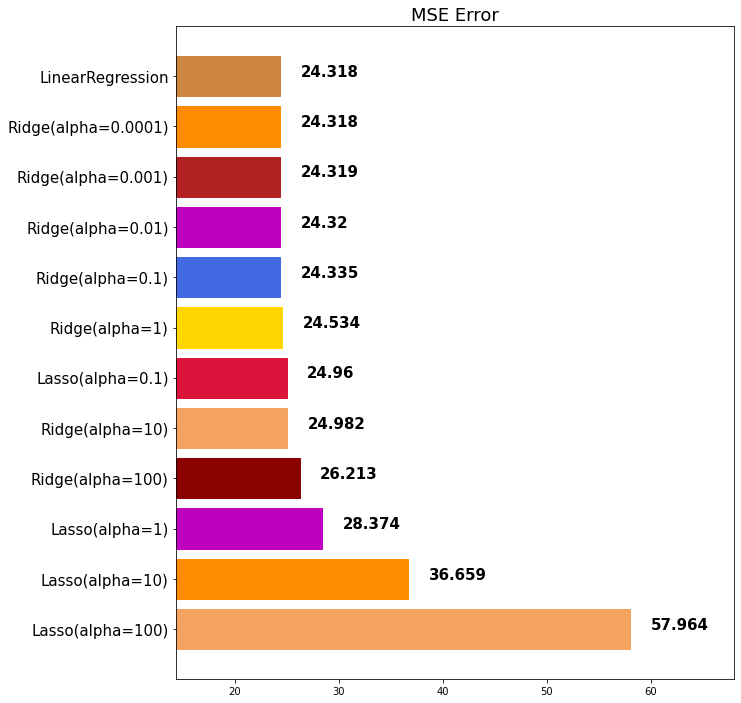

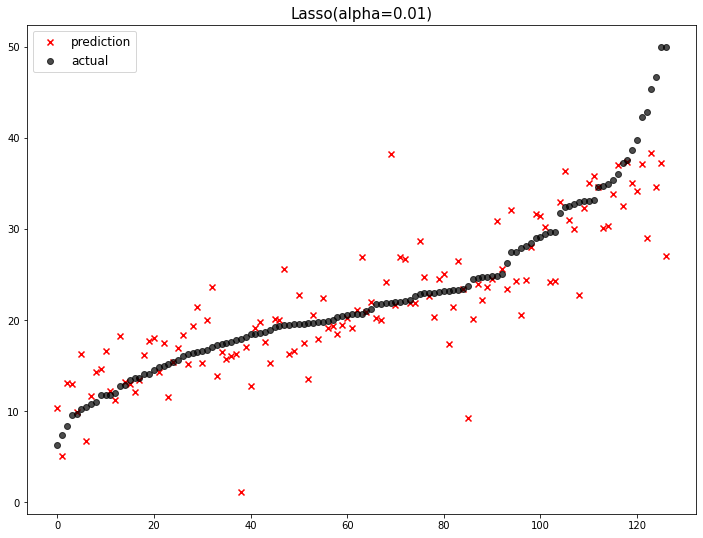

                  model        mse
0      Lasso(alpha=100)  57.964223
1       Lasso(alpha=10)  36.658752
2        Lasso(alpha=1)  28.373671
3      Ridge(alpha=100)  26.212669
4       Ridge(alpha=10)  24.981828
5      Lasso(alpha=0.1)  24.960240
6        Ridge(alpha=1)  24.534453
7     Lasso(alpha=0.01)  24.337734
8      Ridge(alpha=0.1)  24.334725
9     Ridge(alpha=0.01)  24.319773
10   Ridge(alpha=0.001)  24.318557
11  Ridge(alpha=0.0001)  24.318439
12     LinearRegression  24.318426


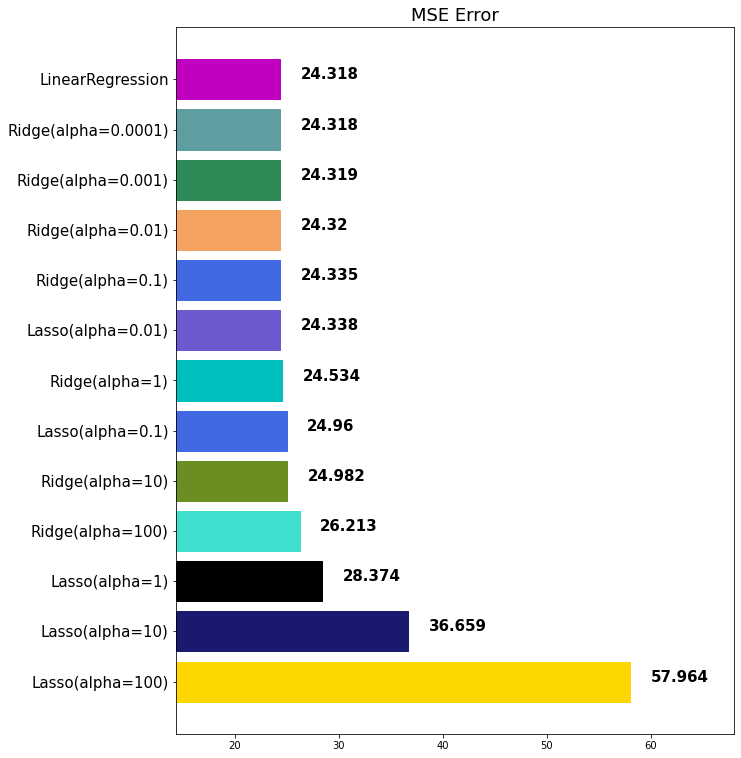

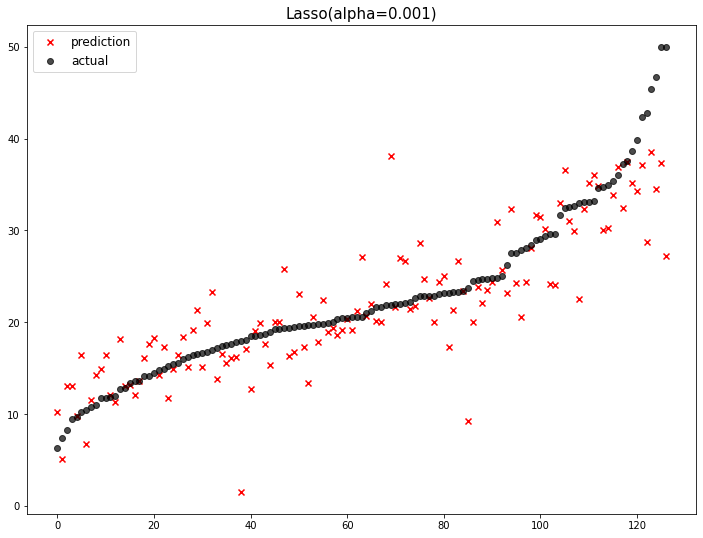

                  model        mse
0      Lasso(alpha=100)  57.964223
1       Lasso(alpha=10)  36.658752
2        Lasso(alpha=1)  28.373671
3      Ridge(alpha=100)  26.212669
4       Ridge(alpha=10)  24.981828
5      Lasso(alpha=0.1)  24.960240
6        Ridge(alpha=1)  24.534453
7     Lasso(alpha=0.01)  24.337734
8      Ridge(alpha=0.1)  24.334725
9     Ridge(alpha=0.01)  24.319773
10   Ridge(alpha=0.001)  24.318557
11  Ridge(alpha=0.0001)  24.318439
12     LinearRegression  24.318426
13   Lasso(alpha=0.001)  24.317879


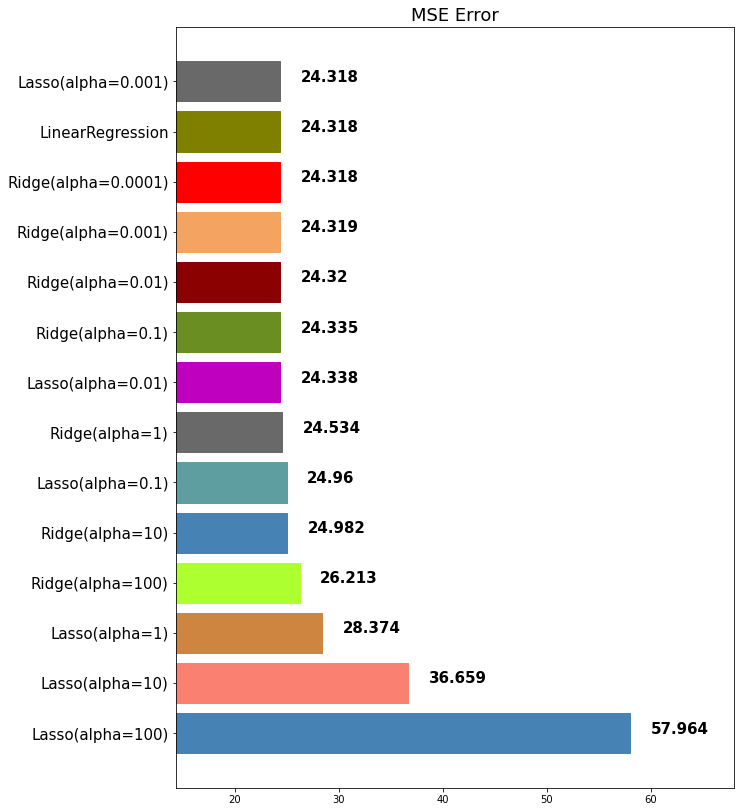

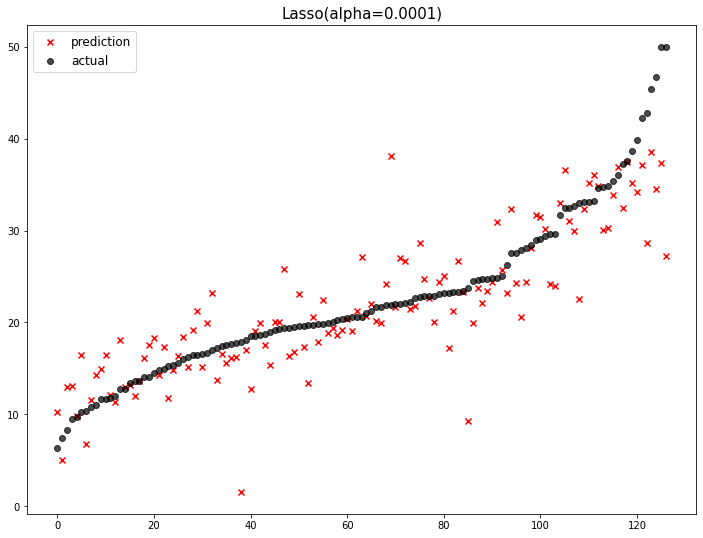

                  model        mse
0      Lasso(alpha=100)  57.964223
1       Lasso(alpha=10)  36.658752
2        Lasso(alpha=1)  28.373671
3      Ridge(alpha=100)  26.212669
4       Ridge(alpha=10)  24.981828
5      Lasso(alpha=0.1)  24.960240
6        Ridge(alpha=1)  24.534453
7     Lasso(alpha=0.01)  24.337734
8      Ridge(alpha=0.1)  24.334725
9     Ridge(alpha=0.01)  24.319773
10   Ridge(alpha=0.001)  24.318557
11  Ridge(alpha=0.0001)  24.318439
12     LinearRegression  24.318426
13  Lasso(alpha=0.0001)  24.318346
14   Lasso(alpha=0.001)  24.317879


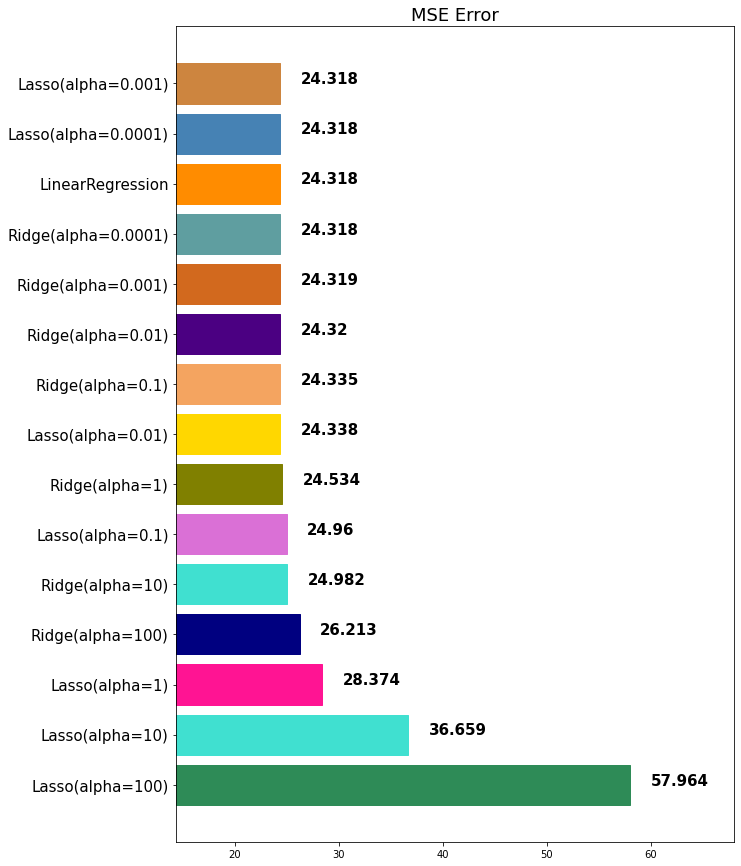

In [44]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [45]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

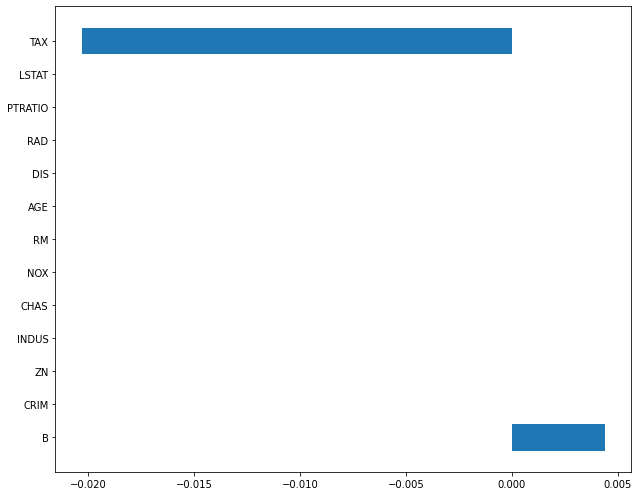

In [46]:
plot_coef(x_train.columns, lasso_100.coef_)

In [47]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02031607,
       -0.        ,  0.00438631, -0.        ])

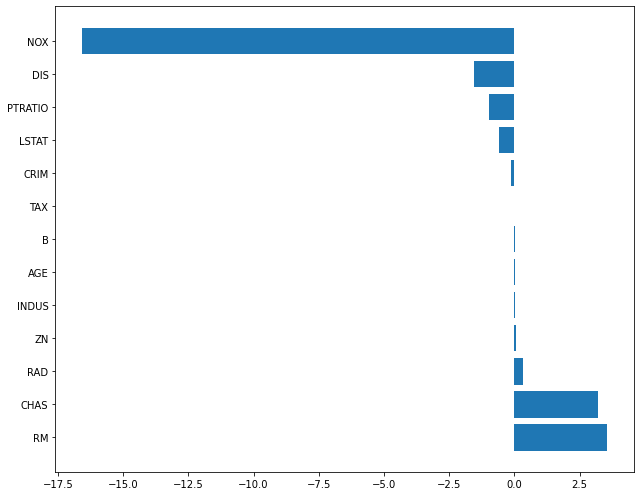

In [48]:
plot_coef(x_train.columns, lasso_001.coef_)

In [49]:
lasso_001.coef_

array([ -0.11662099,   0.06235308,   0.02747024,   3.21507251,
       -16.58568705,   3.56312186,   0.01169805,  -1.53301658,
         0.32496879,  -0.01256968,  -0.96048332,   0.00820375,
        -0.579356  ])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용). 
 * l1_ratio = 1 (L1 규제만 사용). 
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [50]:
from sklearn.linear_model import ElasticNet

In [51]:
ratios = [0.2, 0.5, 0.8]

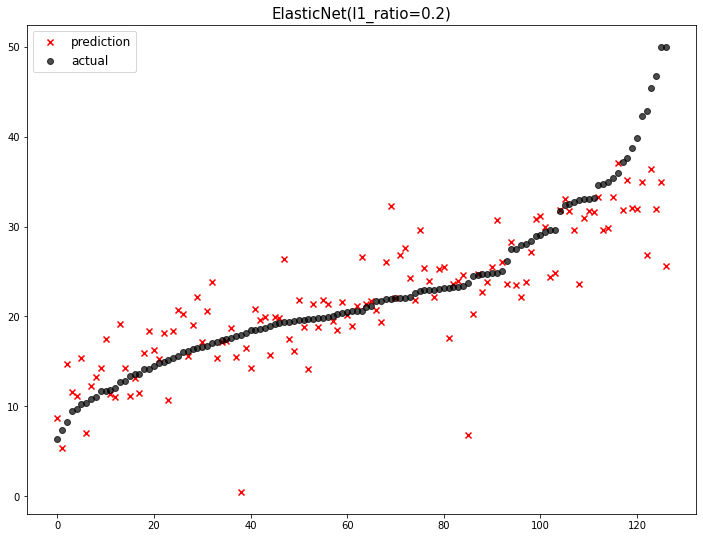

                       model        mse
0           Lasso(alpha=100)  57.964223
1            Lasso(alpha=10)  36.658752
2             Lasso(alpha=1)  28.373671
3   ElasticNet(l1_ratio=0.2)  26.938519
4           Ridge(alpha=100)  26.212669
5            Ridge(alpha=10)  24.981828
6           Lasso(alpha=0.1)  24.960240
7             Ridge(alpha=1)  24.534453
8          Lasso(alpha=0.01)  24.337734
9           Ridge(alpha=0.1)  24.334725
10         Ridge(alpha=0.01)  24.319773
11        Ridge(alpha=0.001)  24.318557
12       Ridge(alpha=0.0001)  24.318439
13          LinearRegression  24.318426
14       Lasso(alpha=0.0001)  24.318346
15        Lasso(alpha=0.001)  24.317879


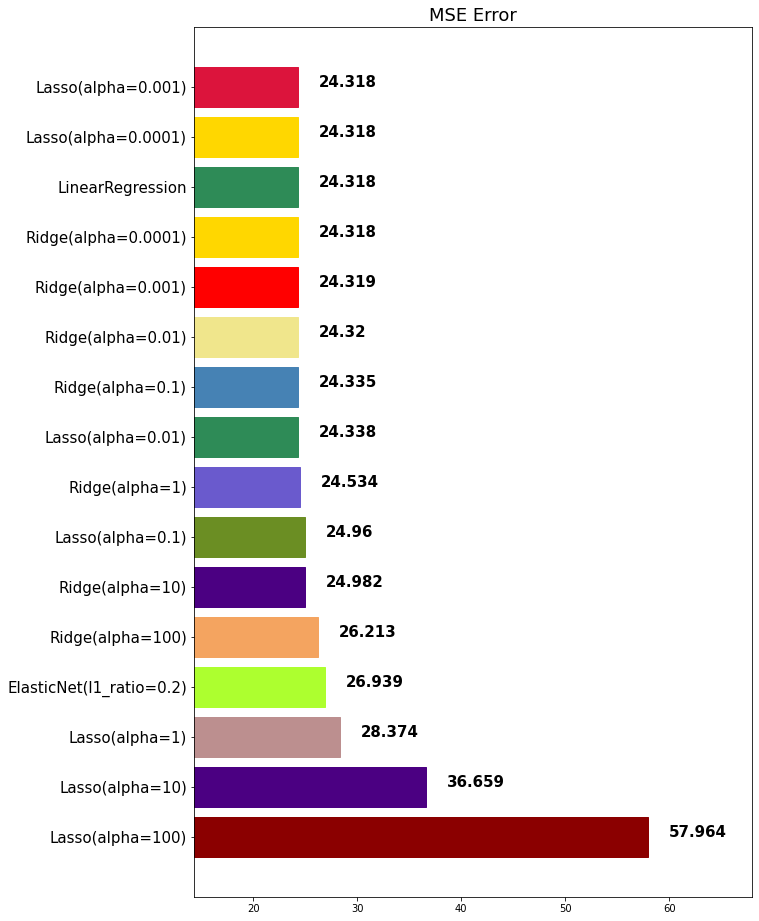

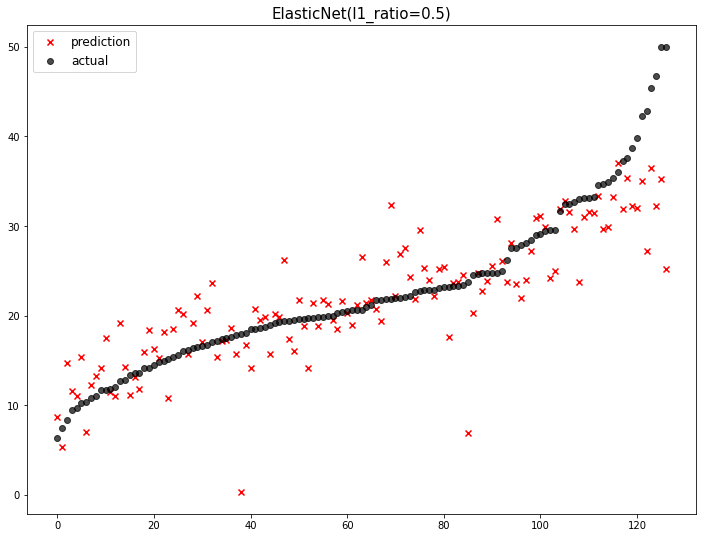

                       model        mse
0           Lasso(alpha=100)  57.964223
1            Lasso(alpha=10)  36.658752
2             Lasso(alpha=1)  28.373671
3   ElasticNet(l1_ratio=0.2)  26.938519
4   ElasticNet(l1_ratio=0.5)  26.699938
5           Ridge(alpha=100)  26.212669
6            Ridge(alpha=10)  24.981828
7           Lasso(alpha=0.1)  24.960240
8             Ridge(alpha=1)  24.534453
9          Lasso(alpha=0.01)  24.337734
10          Ridge(alpha=0.1)  24.334725
11         Ridge(alpha=0.01)  24.319773
12        Ridge(alpha=0.001)  24.318557
13       Ridge(alpha=0.0001)  24.318439
14          LinearRegression  24.318426
15       Lasso(alpha=0.0001)  24.318346
16        Lasso(alpha=0.001)  24.317879


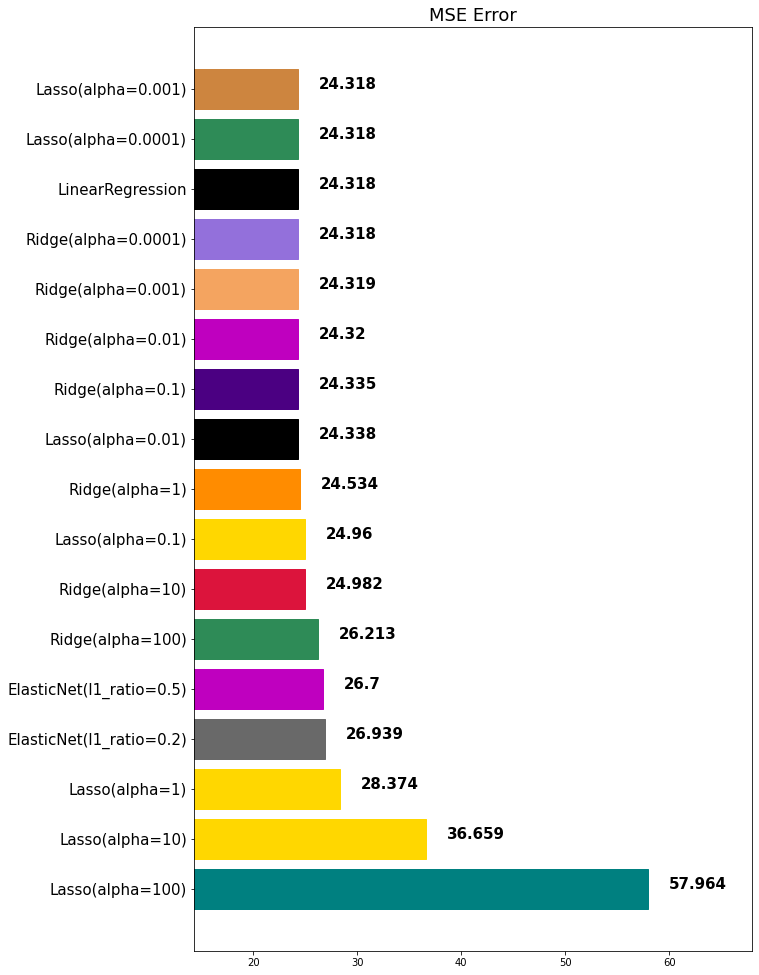

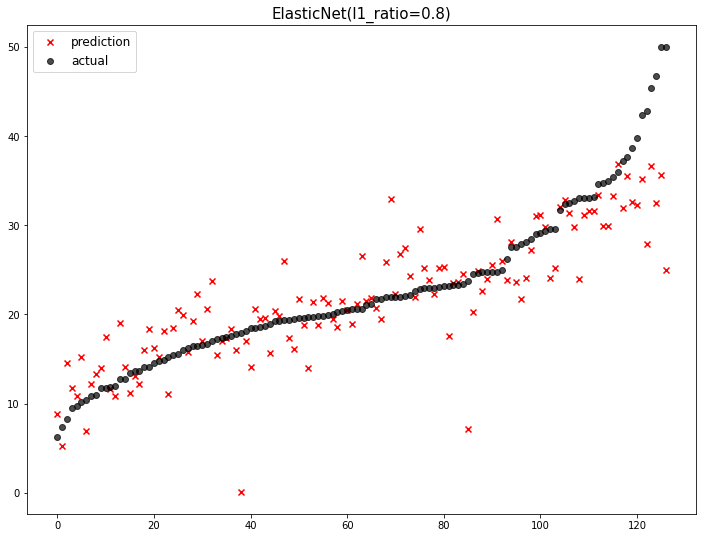

                       model        mse
0           Lasso(alpha=100)  57.964223
1            Lasso(alpha=10)  36.658752
2             Lasso(alpha=1)  28.373671
3   ElasticNet(l1_ratio=0.2)  26.938519
4   ElasticNet(l1_ratio=0.5)  26.699938
5   ElasticNet(l1_ratio=0.8)  26.280042
6           Ridge(alpha=100)  26.212669
7            Ridge(alpha=10)  24.981828
8           Lasso(alpha=0.1)  24.960240
9             Ridge(alpha=1)  24.534453
10         Lasso(alpha=0.01)  24.337734
11          Ridge(alpha=0.1)  24.334725
12         Ridge(alpha=0.01)  24.319773
13        Ridge(alpha=0.001)  24.318557
14       Ridge(alpha=0.0001)  24.318439
15          LinearRegression  24.318426
16       Lasso(alpha=0.0001)  24.318346
17        Lasso(alpha=0.001)  24.317879


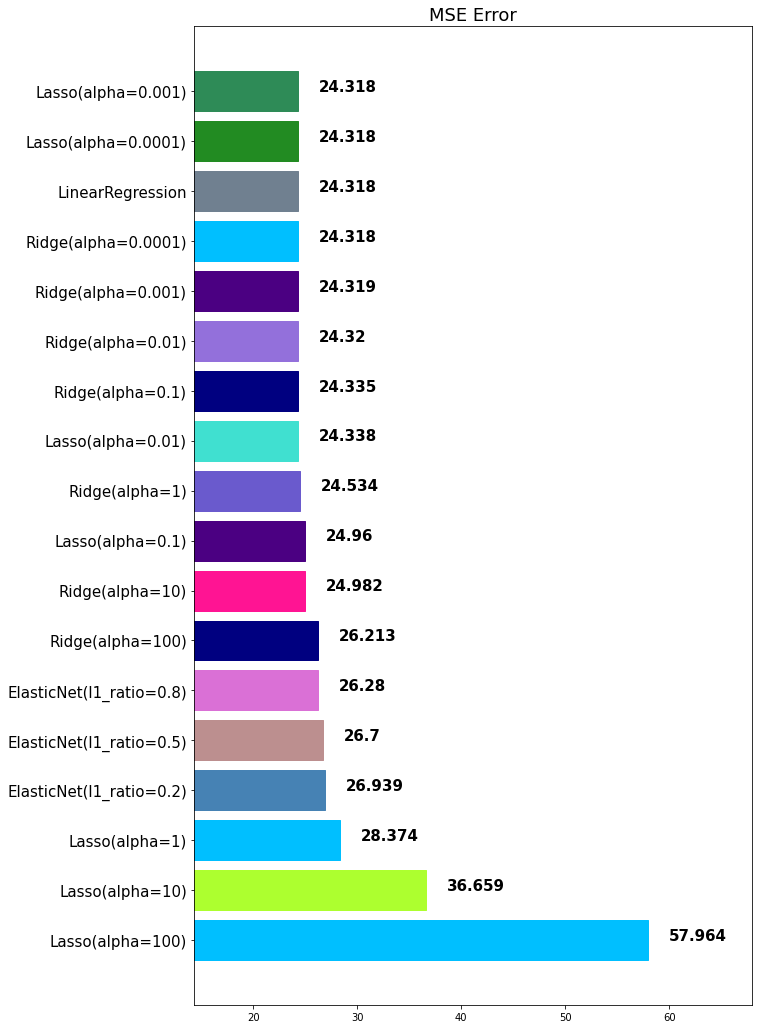

In [52]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [53]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

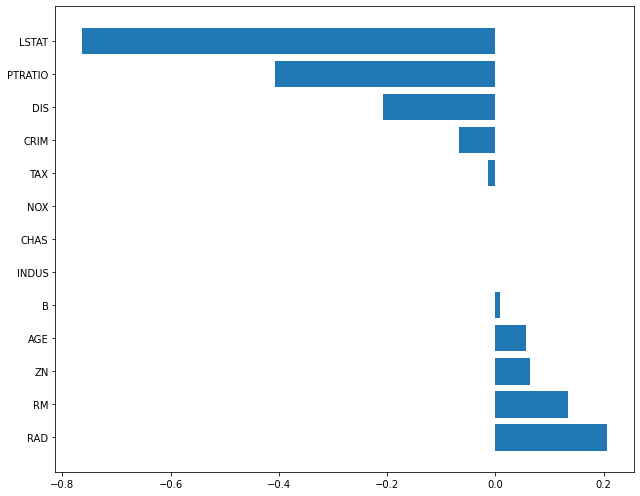

In [54]:
plot_coef(x_train.columns, elsticnet_20.coef_)

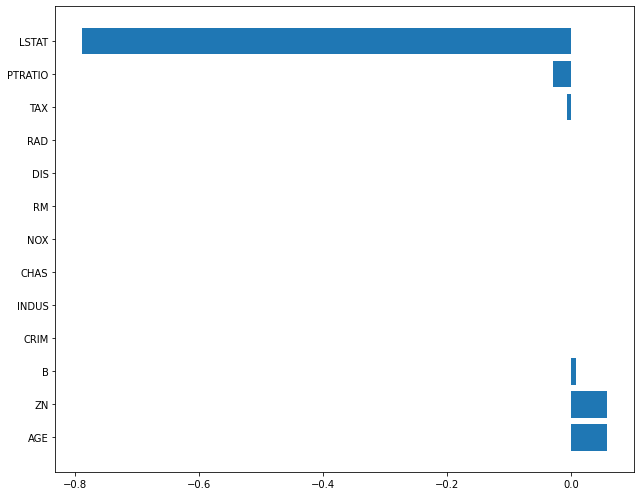

In [55]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [56]:
elsticnet_80.coef_

array([-0.        ,  0.05737696, -0.        ,  0.        ,  0.        ,
        0.        ,  0.0579022 , -0.        ,  0.        , -0.00725069,
       -0.02955541,  0.00714876, -0.78845754])

## Scaler

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [58]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.889895,11.494723,11.275726,0.071240,0.558949,6.283132,69.896042,3.691199,9.680739,409.781003,18.398681,359.289499,12.705172
std,9.446966,23.851668,6.829273,0.257566,0.117435,0.704477,27.999961,2.056791,8.749357,169.104730,2.200066,87.723570,7.243747
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082215,0.000000,5.160000,0.000000,0.455500,5.913500,45.250000,2.083500,4.000000,277.000000,17.000000,375.695000,7.185000
50%,0.290900,0.000000,9.900000,0.000000,0.538000,6.226000,80.300000,3.066500,5.000000,330.000000,18.700000,391.500000,11.220000
75%,3.805910,12.500000,18.100000,0.000000,0.631000,6.629500,94.500000,5.057250,24.000000,666.000000,20.200000,396.260000,17.095000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [59]:
std_scaler = StandardScaler()

In [60]:
std_scaled = std_scaler.fit_transform(x_train)

In [61]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.48,-1.59,-0.28,-1.48,-3.87,-2.40,-1.24,-0.99,-1.32,-2.64,-4.10,-1.52
25%,-0.40,-0.48,-0.90,-0.28,-0.88,-0.53,-0.88,-0.78,-0.65,-0.79,-0.64,0.19,-0.76
50%,-0.38,-0.48,-0.20,-0.28,-0.18,-0.08,0.37,-0.30,-0.54,-0.47,0.14,0.37,-0.21
75%,-0.01,0.04,1.00,-0.28,0.61,0.49,0.88,0.67,1.64,1.52,0.82,0.42,0.61
max,9.02,3.72,2.41,3.61,2.66,3.47,1.08,4.11,1.64,1.78,1.64,0.43,3.49


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [62]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [63]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.11,0.40,0.07,0.36,0.53,0.69,0.23,0.38,0.43,0.62,0.91,0.30
std,0.11,0.24,0.25,0.26,0.24,0.14,0.29,0.19,0.38,0.32,0.23,0.22,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.15,0.46,0.44,0.09,0.13,0.17,0.47,0.95,0.15
50%,0.00,0.00,0.35,0.00,0.31,0.52,0.80,0.18,0.17,0.27,0.65,0.99,0.26
75%,0.04,0.12,0.65,0.00,0.51,0.59,0.94,0.36,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [64]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [65]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [66]:
from sklearn.pipeline import make_pipeline

In [67]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [68]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

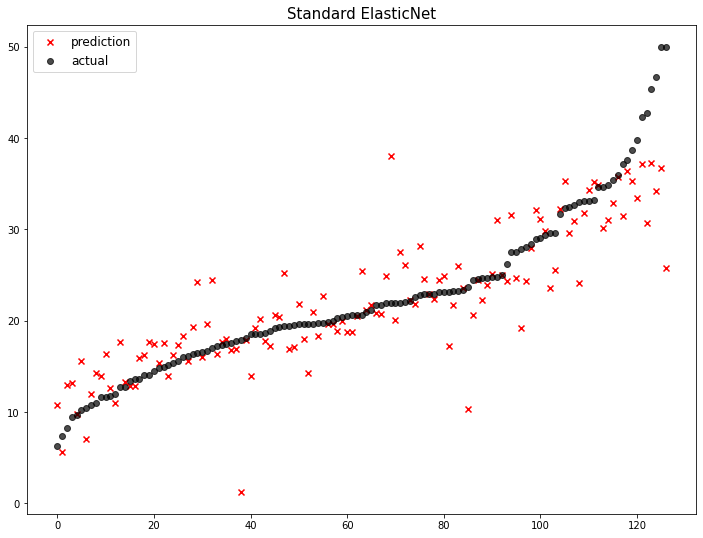

                       model        mse
0           Lasso(alpha=100)  57.964223
1            Lasso(alpha=10)  36.658752
2             Lasso(alpha=1)  28.373671
3   ElasticNet(l1_ratio=0.2)  26.938519
4   ElasticNet(l1_ratio=0.5)  26.699938
5   ElasticNet(l1_ratio=0.8)  26.280042
6           Ridge(alpha=100)  26.212669
7            Ridge(alpha=10)  24.981828
8           Lasso(alpha=0.1)  24.960240
9             Ridge(alpha=1)  24.534453
10         Lasso(alpha=0.01)  24.337734
11          Ridge(alpha=0.1)  24.334725
12         Ridge(alpha=0.01)  24.319773
13        Ridge(alpha=0.001)  24.318557
14       Ridge(alpha=0.0001)  24.318439
15          LinearRegression  24.318426
16       Lasso(alpha=0.0001)  24.318346
17        Lasso(alpha=0.001)  24.317879
18       Standard ElasticNet  23.643172


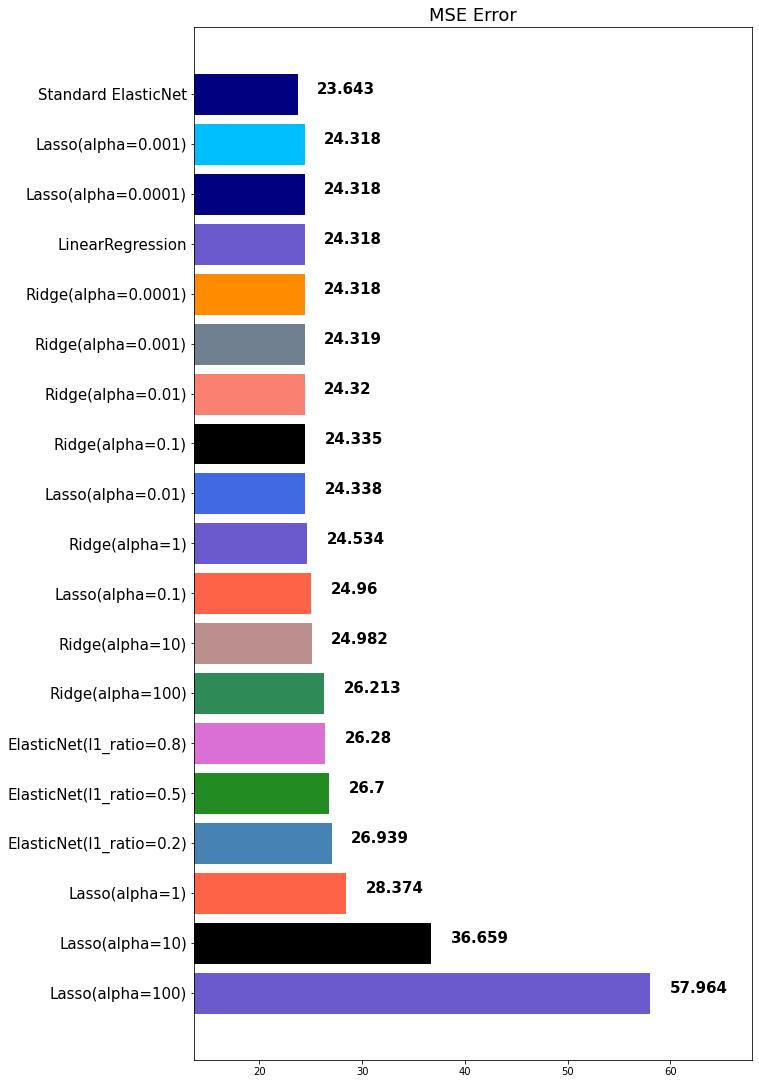

In [69]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

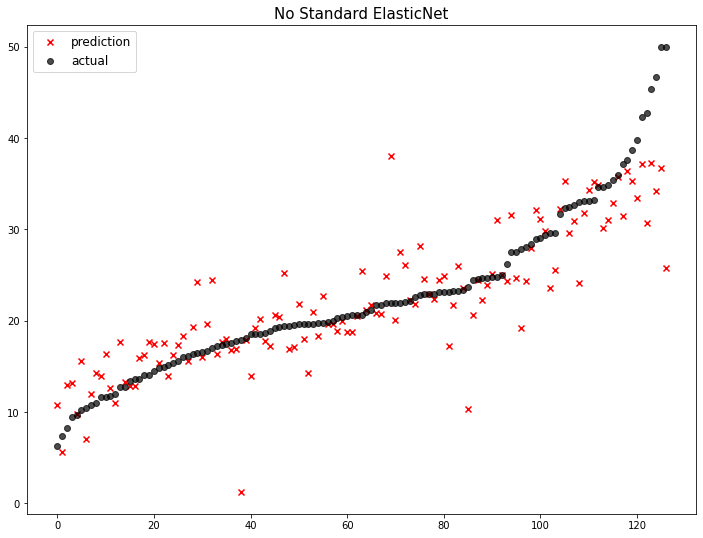

                       model        mse
0           Lasso(alpha=100)  57.964223
1            Lasso(alpha=10)  36.658752
2             Lasso(alpha=1)  28.373671
3   ElasticNet(l1_ratio=0.2)  26.938519
4   ElasticNet(l1_ratio=0.5)  26.699938
5   ElasticNet(l1_ratio=0.8)  26.280042
6           Ridge(alpha=100)  26.212669
7            Ridge(alpha=10)  24.981828
8           Lasso(alpha=0.1)  24.960240
9             Ridge(alpha=1)  24.534453
10         Lasso(alpha=0.01)  24.337734
11          Ridge(alpha=0.1)  24.334725
12         Ridge(alpha=0.01)  24.319773
13        Ridge(alpha=0.001)  24.318557
14       Ridge(alpha=0.0001)  24.318439
15          LinearRegression  24.318426
16       Lasso(alpha=0.0001)  24.318346
17        Lasso(alpha=0.001)  24.317879
18       Standard ElasticNet  23.643172
19    No Standard ElasticNet  23.643172


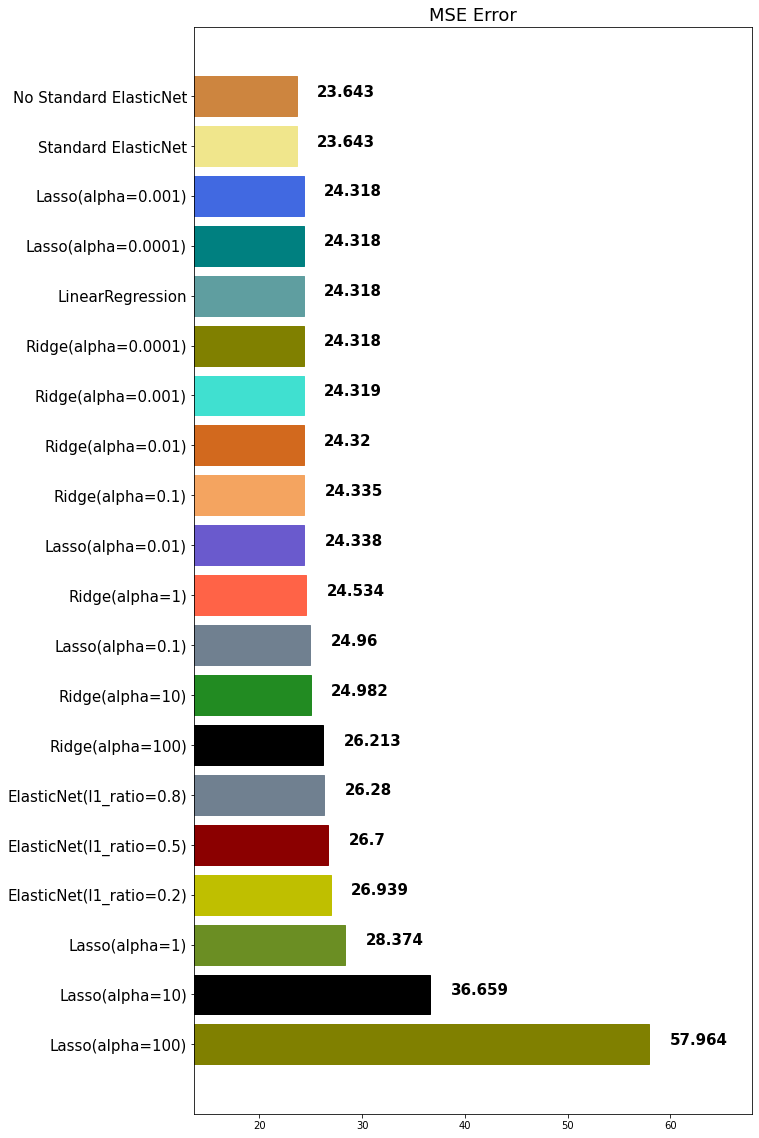

In [70]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [73]:
poly_features = poly.fit_transform(x_train)[0]

In [74]:
poly_features

array([     5.82115   ,      0.        ,     18.1       ,      0.        ,
            0.713     ,      6.513     ,     89.9       ,      2.8016    ,
           24.        ,    666.        ,     20.2       ,    393.82      ,
           10.29      ,     33.88578732,      0.        ,    105.362815  ,
            0.        ,      4.15047995,     37.91314995,    523.321385  ,
           16.30853384,    139.7076    ,   3876.8859    ,    117.58723   ,
         2292.485293  ,     59.8996335 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    327.61      ,      0.        ,
           12.9053    ,    117.8853    ,   1627.19      ,     50.70896   ,
          434.4       ,  12054.6       ,    365.62      ,   7128.142     ,
          186.249     ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [75]:
x_train.iloc[0]

CRIM         5.82115
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.71300
RM           6.51300
AGE         89.90000
DIS          2.80160
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          393.82000
LSTAT       10.29000
Name: 463, dtype: float64

In [76]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [77]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

c:\users\bsy37\jupyter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.151800020993505, tolerance: 3.2627859577836418
  model = cd_fast.enet_coordinate_descent(


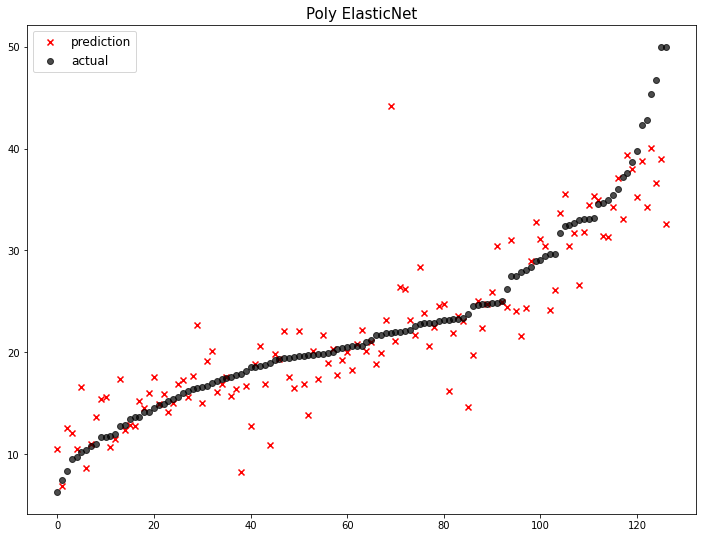

                       model        mse
0           Lasso(alpha=100)  57.964223
1            Lasso(alpha=10)  36.658752
2             Lasso(alpha=1)  28.373671
3   ElasticNet(l1_ratio=0.2)  26.938519
4   ElasticNet(l1_ratio=0.5)  26.699938
5   ElasticNet(l1_ratio=0.8)  26.280042
6           Ridge(alpha=100)  26.212669
7            Ridge(alpha=10)  24.981828
8           Lasso(alpha=0.1)  24.960240
9             Ridge(alpha=1)  24.534453
10         Lasso(alpha=0.01)  24.337734
11          Ridge(alpha=0.1)  24.334725
12         Ridge(alpha=0.01)  24.319773
13        Ridge(alpha=0.001)  24.318557
14       Ridge(alpha=0.0001)  24.318439
15          LinearRegression  24.318426
16       Lasso(alpha=0.0001)  24.318346
17        Lasso(alpha=0.001)  24.317879
18       Standard ElasticNet  23.643172
19    No Standard ElasticNet  23.643172
20           Poly ElasticNet  17.601523


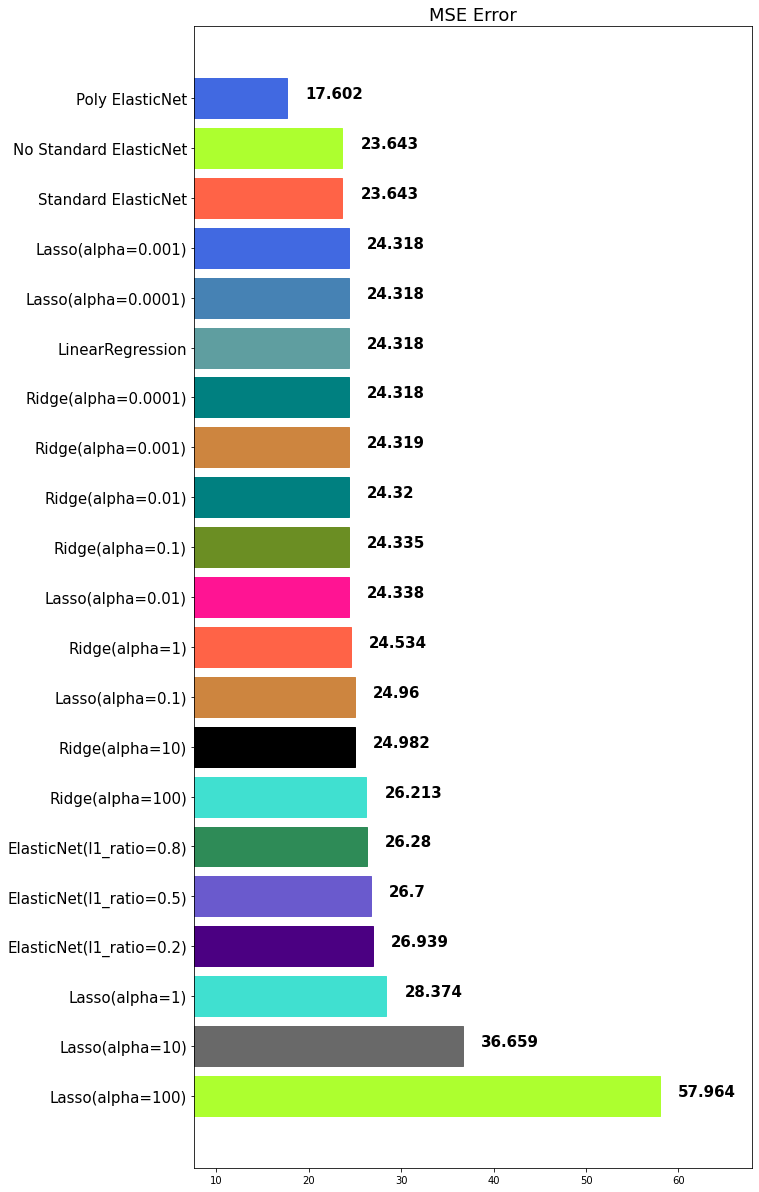

In [78]:
mse_eval('Poly ElasticNet', poly_pred, y_test)